In [332]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix


from sklearn.tree import DecisionTreeClassifier,plot_tree


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [333]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [334]:

data = pd.read_csv("penguinsFeatures.csv")


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [335]:

data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [336]:
# Covariance

print('Covariance:')
data.cov()

Covariance:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [337]:

# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missingValueInstances= missing_values_table(data)
missingValueInstances

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,10,2.9
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [338]:

#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
data.iloc[:,:] = imputer.fit_transform(data)

data.isnull().sum()




species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

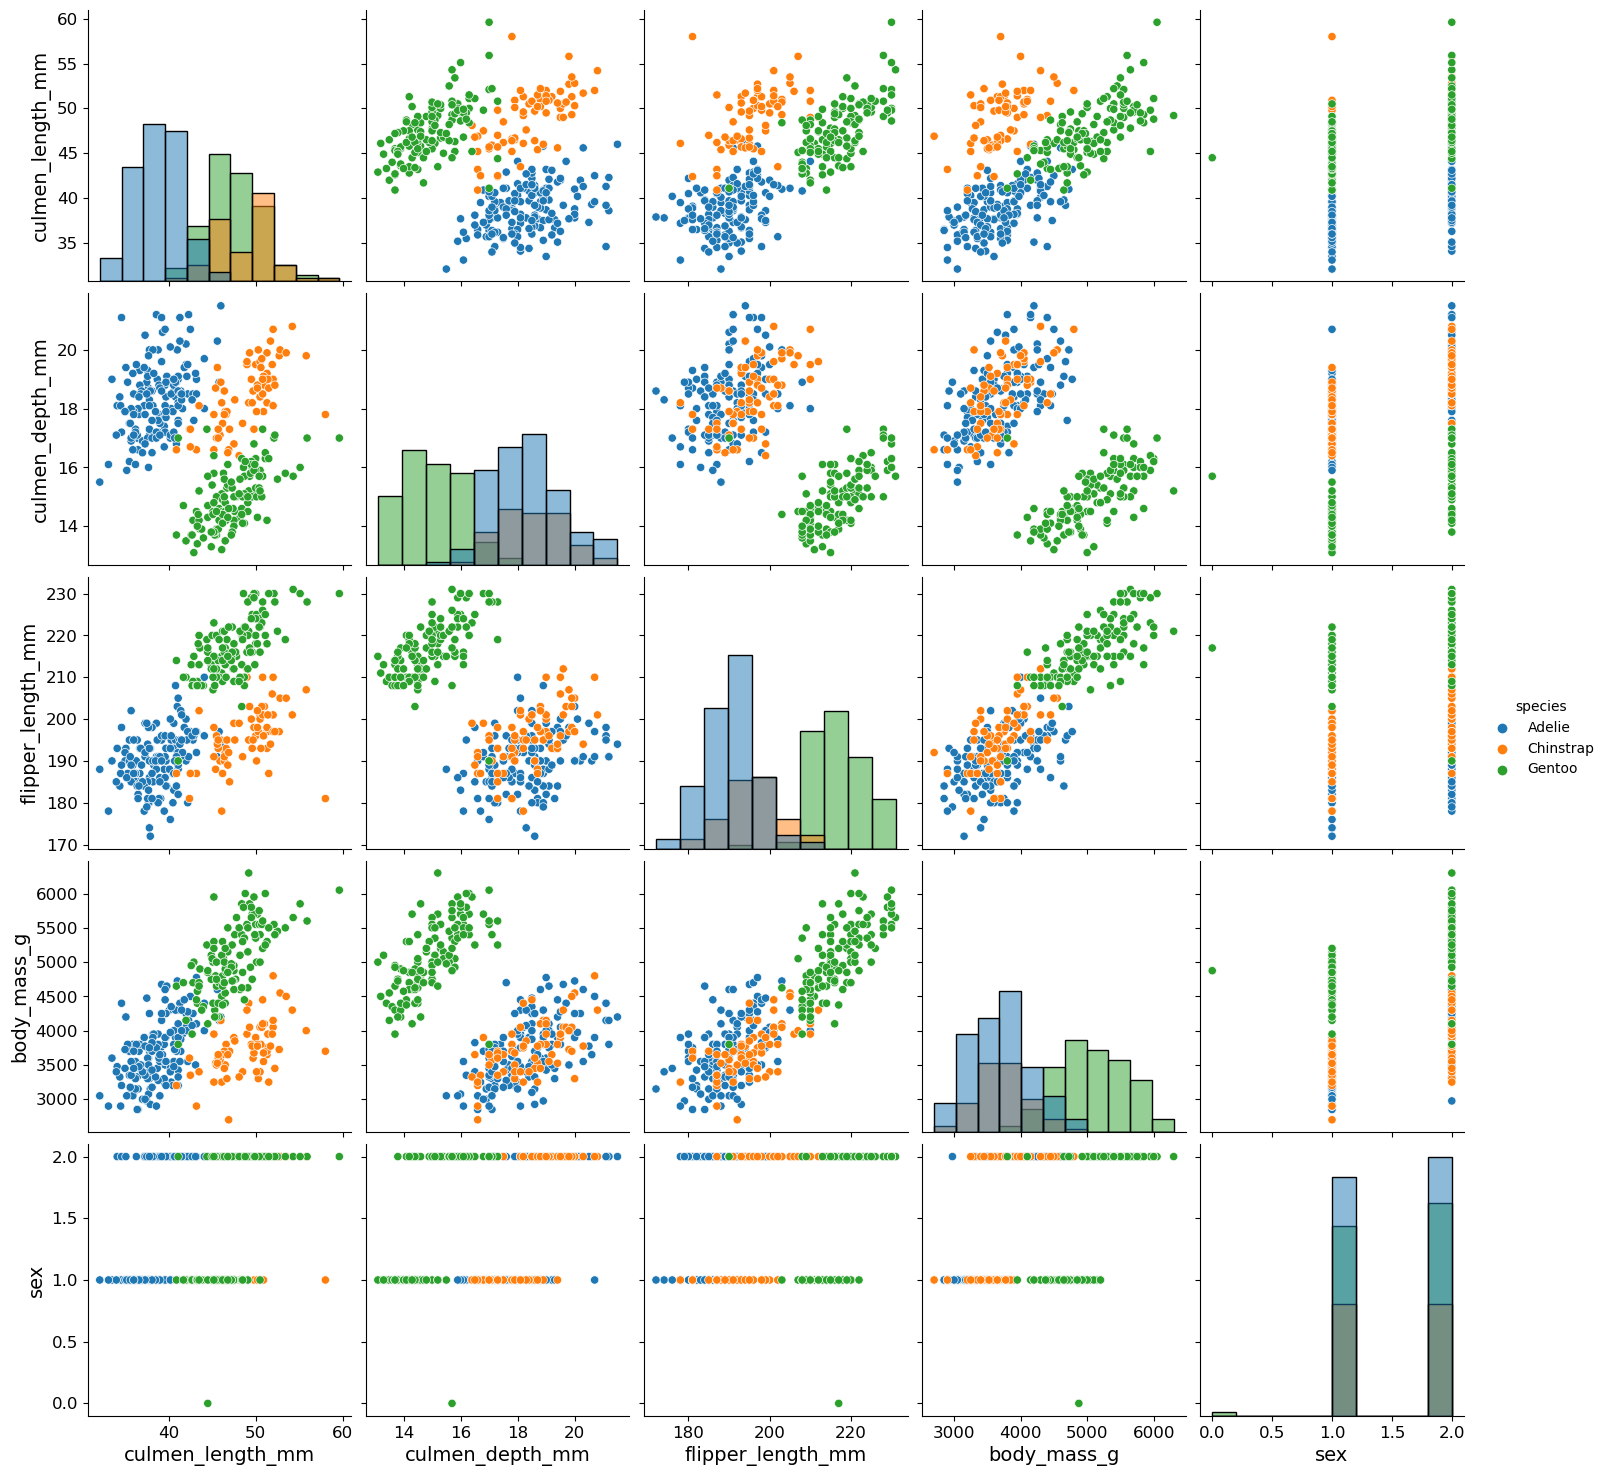

In [339]:
#Assigning binary classification for data
lb = LabelEncoder()
data["sex"] = lb.fit_transform(data["sex"])

sns.pairplot(data, hue="species", height=3,diag_kind="hist")


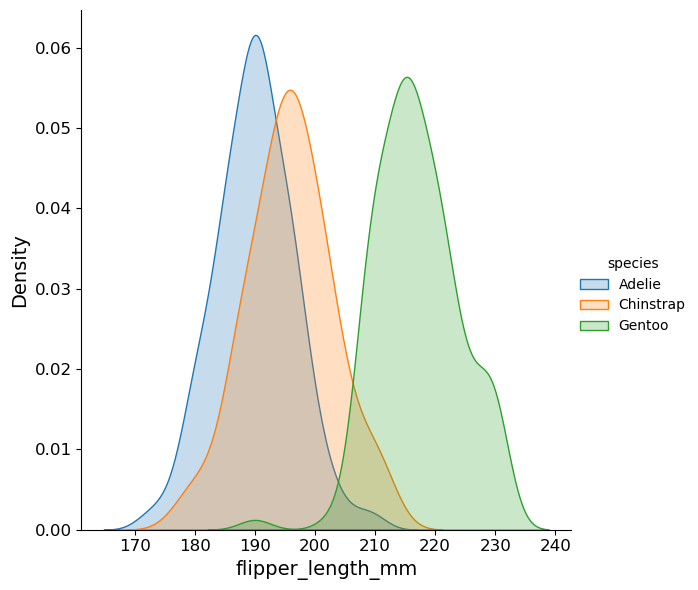

In [340]:
sns.FacetGrid(data, hue="species", height=6,) \
   .map(sns.kdeplot, "flipper_length_mm",fill=True) \
   .add_legend()

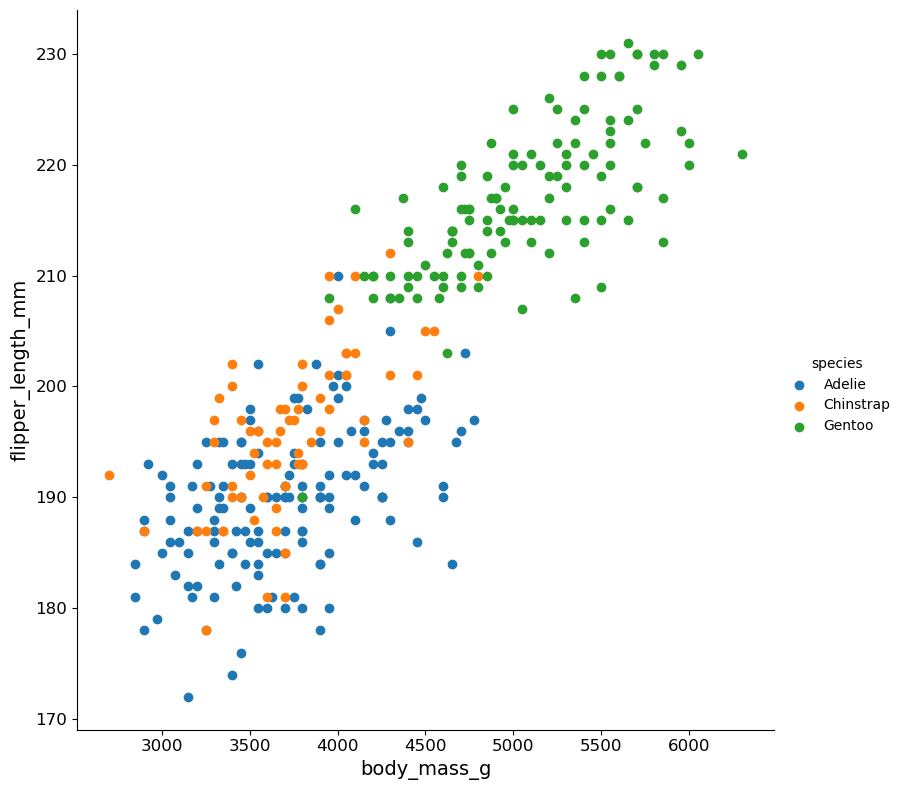

In [341]:
sns.FacetGrid(data, hue="species", height=8) \
   .map(plt.scatter, "body_mass_g", "flipper_length_mm") \
   .add_legend()

In [342]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [343]:
LinearData = data.copy()

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

LinearData['species'].unique()
LinearData['species'].replace({'Adelie' : 1,
                                'Chinstrap' : 2,
                                'Gentoo': 3}, inplace = True)

LinearData['culmen_length_mm'] = mms.fit_transform(LinearData['culmen_length_mm'].values.reshape(-1, 1))
LinearData['culmen_depth_mm'] = mms.fit_transform(LinearData['culmen_depth_mm'].values.reshape(-1, 1))
LinearData['flipper_length_mm'] = mms.fit_transform(LinearData['flipper_length_mm'].values.reshape(-1, 1))
LinearData['body_mass_g'] = mms.fit_transform(LinearData['body_mass_g'].values.reshape(-1, 1))



feature_cols = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g']
X = LinearData[feature_cols] # Features
y = LinearData.species # Target variable

#print(X.shape, y.shape)


In [344]:


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test
    
print(X_train)
print(y_train)


     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
219          0.658182         0.666667           0.440678     0.298611
271          0.596364         0.119048           0.813559     0.722222
266          0.487273         0.095238           0.644068     0.416667
335          0.836364         0.345238           0.983051     0.875000
217          0.636364         0.607143           0.355932     0.298611
..                ...              ...                ...          ...
323          0.618182         0.226190           0.949153     0.777778
192          0.614545         0.761905           0.644068     0.347222
117          0.189091         0.880952           0.457627     0.298611
47           0.196364         0.690476           0.118644     0.076389
172          0.374545         0.500000           0.152542     0.250000

[240 rows x 4 columns]
219    2
271    3
266    3
335    3
217    2
      ..
323    3
192    2
117    1
47     1
172    2
Name: species, Length: 24

<AxesSubplot:>

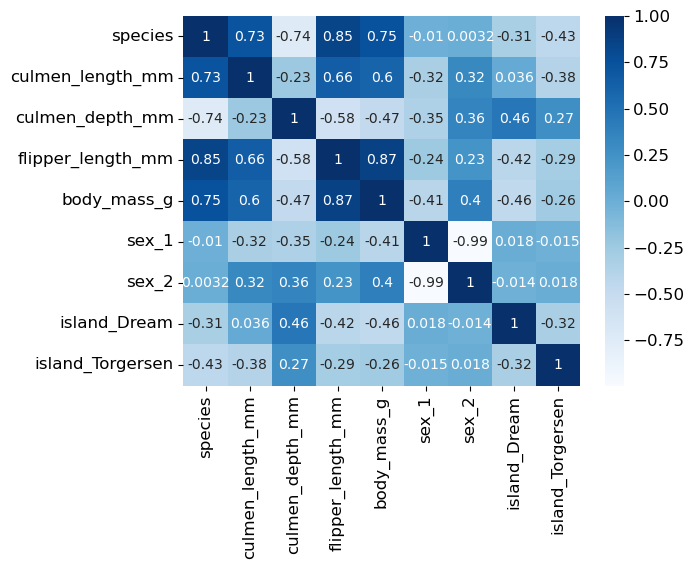

In [345]:
new_df_dummy = pd.get_dummies(LinearData, columns = ['sex', 'island'], drop_first = True)
new_df_dummy['species'].unique()

new_df_dummy['species'].replace({'Adelie' : 0,
                                'Chinstrap' : 1,
                                'Gentoo': 2}, inplace = True)

sns.heatmap(new_df_dummy.corr(), annot = True, cmap = 'Blues')

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
from keras import backend as K

LinearData.describe()


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,1.918605,0.429292,0.482177,0.489013,0.416505,1.514535
std,0.893320,0.198105,0.234412,0.238055,0.222277,0.506308
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.260909,0.297619,0.305085,0.236111,1.000000
50%,2.000000,0.441818,0.500000,0.423729,0.368056,2.000000
75%,3.000000,0.596364,0.666667,0.694915,0.569444,2.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.05>
Epoch 1/500
2/2 [==============================] - 1s 273ms/step - loss: 3.3838 - Accuracy: 0.1833 - mean_squared_error: 3.3838 - val_loss: 3.1786 - val_Accuracy: 0.0000e+00 - val_mean_squared_error: 3.1786
Epoch 2/500
2/2 [==============================] - 0s 49ms/step - loss: 3.3699 - Accuracy: 0.0750 - mean_squared_error: 3.3699 - val_loss: 3.1791 - val_Accuracy: 0.4904 - val_mean_squared_error: 3.1791
Epoch 3/500
2/2 [==============================] - 0s 44ms/step - loss: 3.3708 - Accuracy: 0.4208 - mean_squared_error: 3.3708 - val_loss: 3.1797 - val_Accuracy: 0.4904 - val_mean_squared_error: 3.1797
Epoch 4/500
2/2 [==============================] - 0s 44ms/step - loss: 3.3708 - Accuracy: 0.4208 - mean_squared_error: 3.3708 - val_loss: 3.1760 - val_Accuracy: 0.4904 - val_mean_squared_error: 3.1760
Epoch 5/500
2/2 [==============================] - 0s 44ms/step - loss: 3.3673 - Accuracy: 0.4208 - mean_squared_error: 

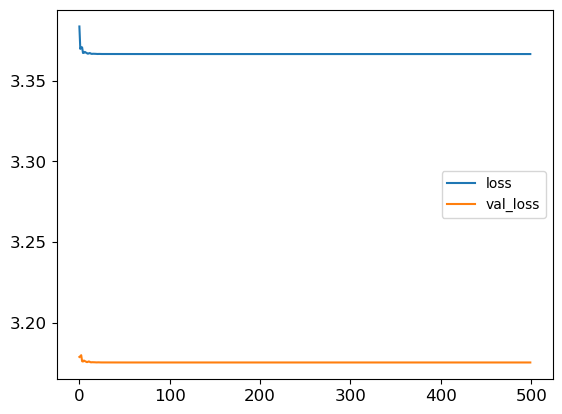

In [347]:
def create_model():
    '''The function creates a Perceptron using Keras'''
    model = Sequential()
    # model.add(Dense(16, input_dim=len(X.columns), activation='relu'))
    # model.add(Dense(12, activation='relu'))
    # model.add(Dropout(0.2))
    # model.add(Dense(3, activation='relu'))
    # model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(8, input_dim=len(X.columns), activation='relu'))
    # model.add(Dense(8, activation='sigmoid'))
    # model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(3, activation='softmax'))
    
    
    return model
estimator = create_model()
optimizer = keras.optimizers.Adam(learning_rate=0.05)
estimator.compile(optimizer=optimizer, metrics=['Accuracy', tf.keras.metrics.MeanSquaredError()], 
                  loss='mean_squared_error')
K.set_value(estimator.optimizer.learning_rate, 0.05)
optimizer.learning_rate.assign(0.05)
print(optimizer.learning_rate)
history = estimator.fit(X_train, y_train, batch_size = 200,epochs=500, validation_data=(X_test, y_test))

print(tf.keras.metrics.Accuracy())

history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()



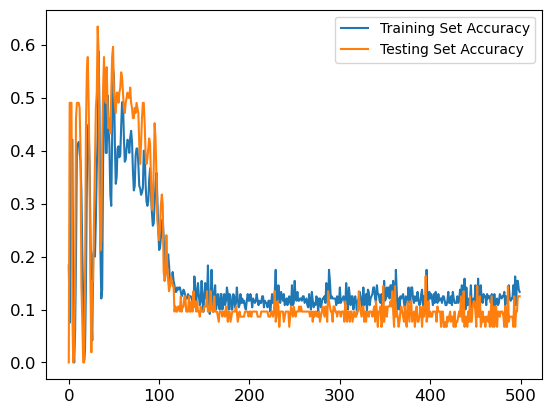

In [348]:

plt.plot(history_df['Accuracy'], label='Training Set Accuracy')
plt.plot(history_df['val_Accuracy'], label='Testing Set Accuracy')
plt.legend()

Epoch 1/400
3/3 [==============================] - 1s 120ms/step - loss: -24.2613 - Accuracy: 0.4208 - val_loss: -209.1919 - val_Accuracy: 0.4904
Epoch 2/400
3/3 [==============================] - 0s 19ms/step - loss: -741.6810 - Accuracy: 0.4208 - val_loss: -2389.4846 - val_Accuracy: 0.4904
Epoch 3/400
3/3 [==============================] - 0s 20ms/step - loss: -5194.9106 - Accuracy: 0.4208 - val_loss: -11638.2051 - val_Accuracy: 0.4904
Epoch 4/400
3/3 [==============================] - 0s 20ms/step - loss: -20606.9707 - Accuracy: 0.4208 - val_loss: -38591.6445 - val_Accuracy: 0.4904
Epoch 5/400
3/3 [==============================] - 0s 19ms/step - loss: -61999.3516 - Accuracy: 0.4208 - val_loss: -102332.3672 - val_Accuracy: 0.4904
Epoch 6/400
3/3 [==============================] - 0s 19ms/step - loss: -156956.8906 - Accuracy: 0.4208 - val_loss: -234104.7812 - val_Accuracy: 0.4904
Epoch 7/400
3/3 [==============================] - 0s 19ms/step - loss: -335828.5000 - Accuracy: 0.4208 -

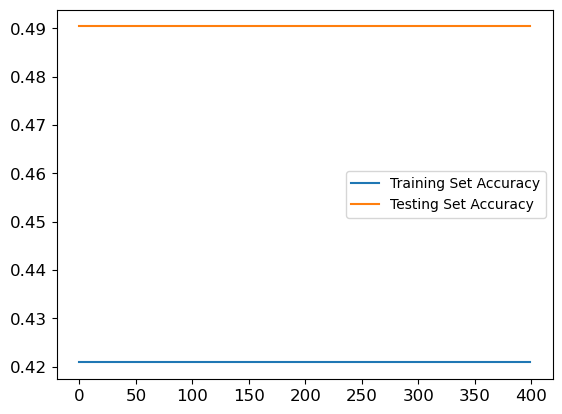

In [349]:
def create_model():
    '''The function creates a Perceptron using Keras'''
    model = Sequential()
    # model.add(Dense(16, input_dim=len(X.columns), activation='relu'))
    # model.add(Dense(12, activation='relu'))
    # model.add(Dropout(0.2))
    # model.add(Dense(3, activation='relu'))
    # model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(12, input_dim=len(X.columns), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='softmax'))
    
    return model
estimator = create_model()
optimizer = keras.optimizers.Adam(learning_rate=0.5)

estimator.compile(optimizer=optimizer, metrics=['Accuracy'], 
                  loss='binary_crossentropy')
#K.set_value(estimator.optimizer.learning_rate, 0.05)

history = estimator.fit(X_train, y_train, batch_size=80, epochs=400, validation_data=(X_test, y_test))


history_df = pd.DataFrame(history.history)

plt.plot(history_df['Accuracy'], label='Training Set Accuracy')
plt.plot(history_df['val_Accuracy'], label='Testing Set Accuracy')
plt.legend()
